In [76]:
from pyecharts import Bar
import pandas as pd
import numpy as np
import pymongo

client = pymongo.MongoClient(host='localhost', port=27017)
db = client.JD_products
table = db.京东无人机
df = pd.DataFrame(list(table.find()))
shop_message = df[df.shop_property == '自营'].groupby(['shop_name'])
shop_com = shop_message['shop_name'].agg(['count'])
shop_com.reset_index(inplace=True)
shop_com_last = shop_com.sort_values('count', ascending=False)[:12]

attr = np.array(shop_com_last['shop_name'])
v1 = np.array(shop_com_last['count'])
attr = ["{}".format(i.replace('京东', '').replace('旗舰店', '').replace('自营', '').replace('官方', '').replace('京东', '').replace('产品专营店', '').replace('工作站', '')) for i in attr]
v1 = ["{}".format(i) for i in v1]
# bar = Bar("京东自营商店笔记本种类排行", title_pos='center', title_top='18', width=1200, height=400)
# bar.add("商家", attr, v1, is_convert=True, xaxis_min=10, yaxis_label_textsize=12, is_yaxis_boundarygap=True, yaxis_interval=0, is_label_show=True, is_legend_show=False, label_pos='right', is_yaxis_inverse=True, is_splitline_show=False)
# #is_legend_show 不显示商品标签 is_label_show=True 显示商品数值
# bar
bar = Bar("京东自营商店无人机种类排行", title_pos='center', title_top='18', width=1000, height=400)
bar.add("商家", attr, v1,xaxis_rotate=30,is_label_show=True,is_legend_show=False)
bar

In [88]:
from pyecharts import Bar
import pandas as pd
import pymongo

client = pymongo.MongoClient('localhost', 27017)
db = client.JD_products
table = db.京东无人机
df = pd.DataFrame(list(table.find()))
price_info = df['price']
bins = [0, 300, 600, 900, 1200, 2000, 3000, 4000, 6000, 8000, 9000, 10000, 12000, 14000, 16000, 19000, 200000]
level = ['0-300', '300-600', '600-900', '900-1200', '1200-2000', '2000-3000', '3000-4000', '4000-6000', '6000-8000', '8000-9000', '9000-10000', '10000-12000', '12000-14000', '14000-16000', '16000-19000', '19000以上']
price_stage = pd.cut(price_info, bins=bins, labels=level).value_counts().sort_index()
attr = price_stage.index
v1 = price_stage.values
bar = Bar('京东无人机价格分布柱状图',  title_pos='center', title_top='10', width=1000, height=400)
bar.add('', attr, v1, is_stack=True, xaxis_rotate=30, yaxis_min=0, xaxis_interval=0, is_splitline_show=False, is_label_show=True)
bar

In [78]:
from pyecharts import Pie
import pandas as pd
import pymongo

client = pymongo.MongoClient('localhost', 27017)
db = client.JD_products
table = db.京东无人机
df = pd.DataFrame(list(table.find()))
shop_message = df.groupby(['shop_property'])
shop_com = shop_message['shop_property'].agg(['count'])
shop_com.reset_index(inplace=True)
shop_com_last = shop_com.sort_values('count', ascending=False)
attr = shop_com_last['shop_property']
v1 = shop_com_last['count']
pie = Pie('商店性质', title_pos='center', width=800, height=400)
pie.add('', attr, v1, radius=[40, 75], label_text_color=None, is_label_show=True, legend_orient='vertical', legend_pos='left')
pie

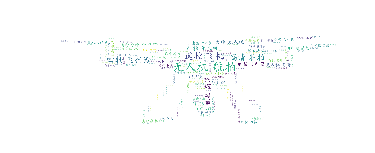

生成词云成功


In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
# from scipy.misc import imread
import pandas as pd
import pymongo
import jieba
import re

client = pymongo.MongoClient('localhost', 27017)
db = client.JD_products
table = db.京东无人机
data = pd.DataFrame(list(table.find()))
data = data[['name']]

text = ''
for line in data['name']:
    r = '[a-zA-Z0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'
    line = re.sub(r, '', line.replace('英寸', ''))
    text += ' '.join(jieba.cut(line, cut_all=False))
# print(text)
backgroud_Image = plt.imread('wrj.jpg')
wc = WordCloud(
    background_color='white',
    font_path="C:\Windows\Fonts\方正楷体简体.TTF",
    # 设置中文字体，使得词云可以显示（词云默认字体是“DroidSansMono.ttf字体库”，不支持中文）
    max_words=150,
    stopwords=STOPWORDS,
    max_font_size=80,
    random_state=30,
    width=1000, height=860, margin=2,
    mask = backgroud_Image,  #设置背景图片
)
wc.generate_from_text(text)
img_colors = ImageColorGenerator(backgroud_Image)
# wc.recolor(color_func=img_colors)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file("ciyun_wrj.jpg")
print("生成词云成功")